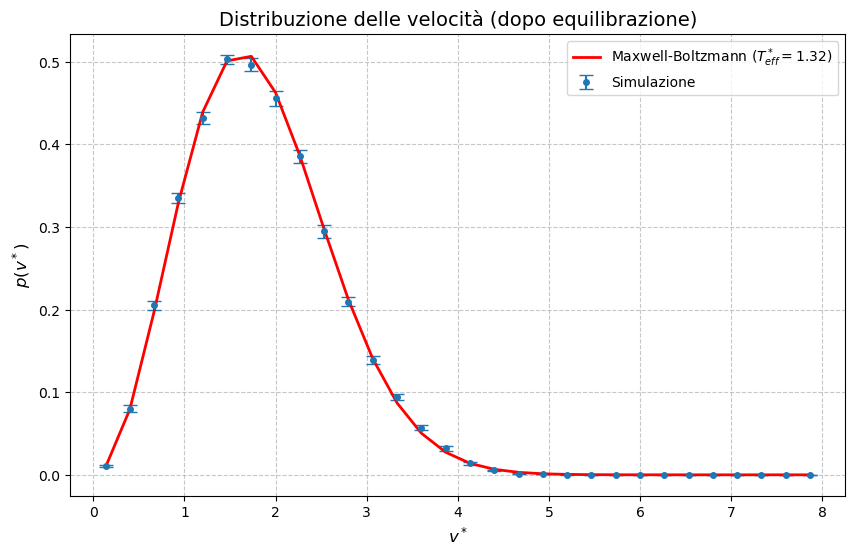

In [2]:
import numpy as np                   # Importa NumPy per operazioni numeriche e gestione array
import matplotlib.pyplot as plt      # Importa Matplotlib per la creazione dei grafici

# Parametri
n_bins = 30                          # Numero di bin usati per la distribuzione delle velocità
equilibration_blocks = 0             # Numero di blocchi da saltare (equilibrazione)

# Leggi i dati da pofv.dat, saltando eventuali blocchi di equilibrazione
data = np.loadtxt("pofv.dat")[equilibration_blocks * n_bins:, :]
#  - np.loadtxt legge tutte le righe di "pofv.dat"
#  - [equilibration_blocks * n_bins:, :] scarta le righe corrispondenti ai blocchi di equil. iniziali
v = data[:, 0]                       # Estrae la colonna 0: velocità v*
p_sim = data[:, 1]                   # Estrae la colonna 1: distribuzione simulata p(v*)
p_err = data[:, 2]                   # Estrae la colonna 2: incertezze su p(v*)

# Calcola T_eff a partire dai dati dell'energia cinetica simulata
kinetic_data = np.loadtxt("kinetic_energy.dat", usecols=2)[equilibration_blocks:]
#  - usecols=2: seleziona la terza colonna di kinetic_energy.dat (media cumulativa della KE)
#  - [equilibration_blocks:] salta i blocchi iniziali di equil.
K_avg = np.mean(kinetic_data)        # Calcola la media di tutte le medie di KE dopo l’equilibrazione
T_eff = (2.0 / 3.0) * K_avg           # Relazione per un gas ideale 3D: ⟨K⟩ = (3/2) T ⇒ T = (2/3) ⟨K⟩

# Calcola la distribuzione teorica di Maxwell–Boltzmann in unità ridotte
p_theory = (1.0 / ((2 * np.pi * T_eff) ** 1.5)) * 4 * np.pi * v**2 * np.exp(-(v**2) / (2 * T_eff))
#  - (1/((2πT)^(3/2))) * 4π v^2 exp(-v^2 / (2T))

# Plot dei dati con barre d'errore
plt.figure(figsize=(10, 6))                # Imposta dimensione figura (10x6 pollici)
plt.errorbar(
    v, p_sim, yerr=p_err, fmt='o', markersize=4, capsize=5,
    label='Simulazione'
)
#  - v: ascisse
#  - p_sim: valori misurati
#  - yerr=p_err: barre d’errore verticali
#  - fmt='o': marker a cerchietti
#  - markersize=4: dimensione del marker
#  - capsize=5: lunghezza delle estremità delle barre
#  - label: etichetta per la legenda

plt.plot(
    v, p_theory, 'r-', linewidth=2,
    label=f'Maxwell-Boltzmann ($T_{{eff}}^*={T_eff:.2f}$)'
)
#  - v: ascisse
#  - p_theory: valori teorici
#  - 'r-': linea continua rossa
#  - linewidth=2: spessore linea
#  - label: etichetta con temperatura efficace

plt.xlabel(r'$v^*$', fontsize=12)          # Etichetta asse x (velocità v*)
plt.ylabel(r'$p(v^*)$', fontsize=12)        # Etichetta asse y (distribuzione p)
plt.title('Distribuzione delle velocità (dopo equilibrazione)', fontsize=14)
                                            # Titolo del grafico
plt.legend()                                # Mostra legenda
plt.grid(linestyle='--', alpha=0.7)         # Griglia tratteggiata con trasparenza 0.7
plt.show()                                  # Visualizza il grafico


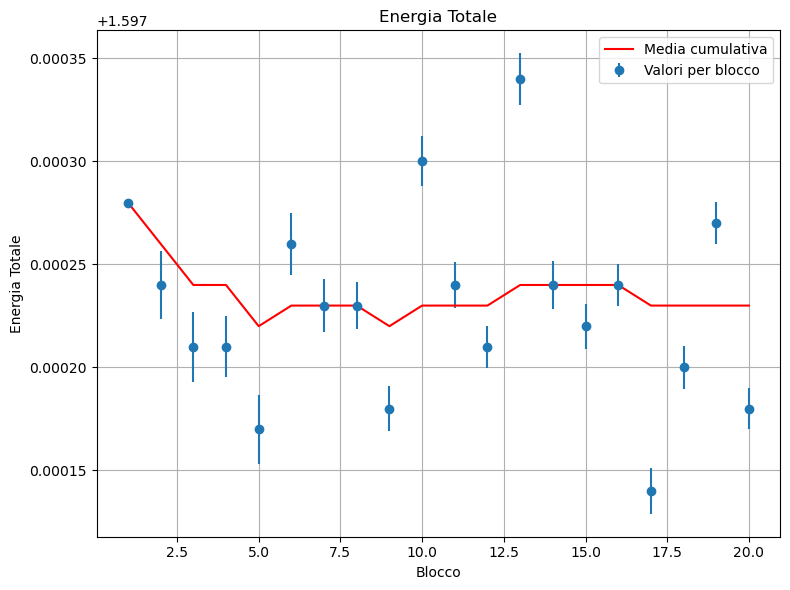

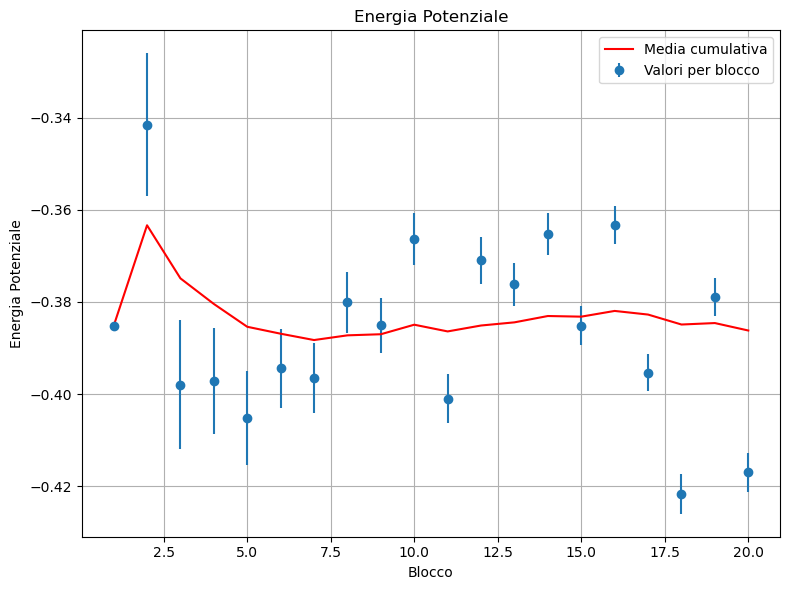

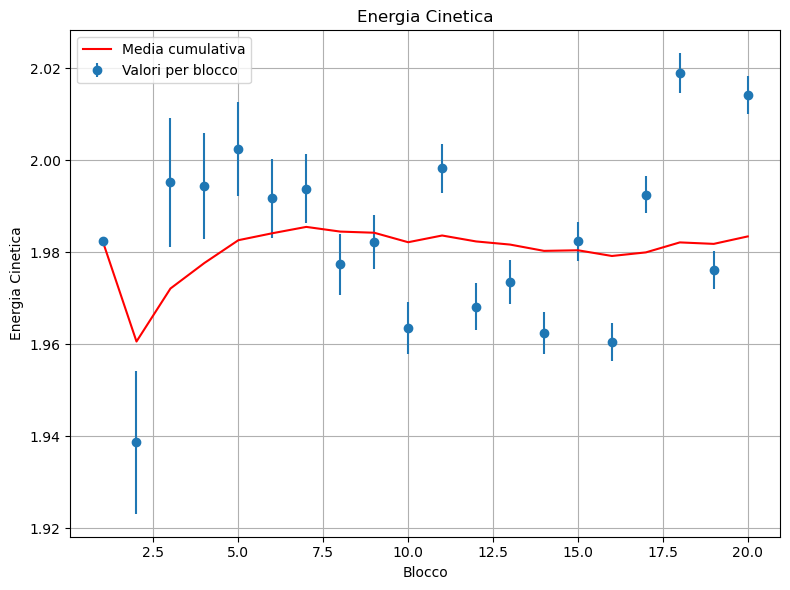

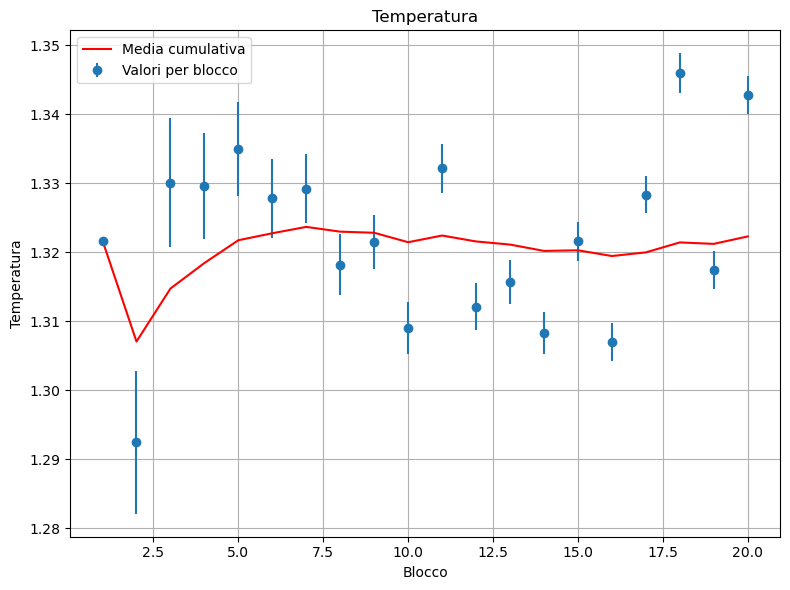

In [3]:
#!/usr/bin/env python3
import numpy as np                   # Importa NumPy per operazioni numeriche
import matplotlib.pyplot as plt      # Importa Matplotlib per la creazione dei grafici

def read_data(filename, skip_header=True):
    """
    Legge i dati da un file di testo e li restituisce come array NumPy.
    Se skip_header=True, ignora righe che iniziano con '#'.
    """
    if skip_header:
        data = np.loadtxt(filename, comments='#')
    else:
        data = np.loadtxt(filename)
    return data

def maxwell_boltzmann(v, T):
    """
    Calcola la distribuzione di Maxwell-Boltzmann per la velocità in unità ridotte.
    Si assume m = 1 e k_B = 1, quindi:
      f(v) = 4 * π * (1/(2πT))^(3/2) * v^2 * exp(-v^2/(2T))
    """
    factor = 4 * np.pi * (1/(2*np.pi*T))**1.5
    return factor * v**2 * np.exp(-v**2/(2*T))

def plot_pofv(pofv_file, T_eff=2.0):
    """
    Legge il file pofv.dat e confronta la distribuzione misurata con 
    la distribuzione di Maxwell-Boltzmann a temperatura T_eff.
    """
    data = read_data(pofv_file)
    # Si assume che il file abbia tre colonne: velocità, valore medio, errore
    v = data[:,0]     # Estrae colonna velocità
    avg = data[:,1]   # Estrae colonna valore medio
    err = data[:,2]   # Estrae colonna errore

    # Vettore continuo di velocità per tracciare la curva teorica
    v_cont = np.linspace(np.min(v), np.max(v), 200)
    mb = maxwell_boltzmann(v_cont, T_eff)

    # Normalizzazione delle distribuzioni affinché l'integrale sia 1
    area_sim = np.trapz(avg, v)      # Calcola l'area sotto la curva simulata (integrazione numerica)
    avg_norm = avg / area_sim        # Normalizza i valori medi simulati
    area_mb = np.trapz(mb, v_cont)    # Calcola l'area sotto la curva teorica
    mb_norm = mb / area_mb           # Normalizza la curva teorica

    # Plot del confronto
    plt.figure(figsize=(8, 6))     
    plt.errorbar(
        v, avg_norm, yerr=err/area_sim, fmt='o', label='Simulazione (POFV)'
    )
    #  - avg_norm: distribuzione simulata normalizzata
    #  - err/area_sim: barre d'errore normalizzate
    #  - fmt='o': marker a cerchietti

    plt.plot(
        v_cont, mb_norm, 'r-', label=f'Maxwell-Boltzmann (T_eff = {T_eff:.2f})'
    )
    #  - v_cont e mb_norm: distribuzione teorica normalizzata
    #  - 'r-': linea continua rossa

    plt.xlabel('Velocità (v*)')          # Etichetta asse x
    plt.ylabel('Distribuzione Normalizzata')  # Etichetta asse y
    plt.title('Confronto distribuzione velocità')  # Titolo del grafico
    plt.legend()                          # Mostra legenda
    plt.grid(True)                        # Mostra griglia
    plt.tight_layout()                    # Ottimizza layout (evita tagli di elementi)
    plt.savefig('pofv_comparison.png')    # Salva il grafico in un file PNG
    plt.show()                            # Visualizza il grafico

def plot_energy(filename, title, ylabel):
    """
    Legge un file di energia o temperatura (almeno 4 colonne: blocco, 
    valore attuale, media cumulativa, errore) e disegna il grafico di 
    andamenti per blocco e media cumulativa.
    """
    data = read_data(filename)
    blocco = data[:,0]    # Estrae colonna blocco
    val = data[:,1]       # Estrae colonna valore per blocco
    media = data[:,2]     # Estrae colonna media cumulativa
    err = data[:,3]       # Estrae colonna errore

    plt.figure(figsize=(8, 6))
    plt.errorbar(
        blocco, val, yerr=err, fmt='o', label='Valori per blocco'
    )
    #  - blocco: ascisse (numero blocco)
    #  - val: valori misurati per ogni blocco
    #  - err: barre d'errore corrispondenti

    plt.plot(
        blocco, media, 'r-', label='Media cumulativa'
    )
    #  - media: media progressiva fino al blocco corrente
    #  - 'r-': linea continua rossa

    plt.xlabel('Blocco')        # Etichetta asse x
    plt.ylabel(ylabel)          # Etichetta asse y (passata come argomento)
    plt.title(title)            # Titolo del grafico
    plt.legend()                # Mostra legenda
    plt.grid(True)              # Mostra griglia
    plt.tight_layout()          # Ottimizza layout
    plt.savefig(title.replace(" ", "_") + ".png")
    plt.show()                  # Visualizza il grafico

def main():
    # Genera i grafici per energie e temperatura
    plot_energy("total_energy.dat", "Energia Totale", "Energia Totale")
    plot_energy("potential_energy.dat", "Energia Potenziale", "Energia Potenziale")
    plot_energy("kinetic_energy.dat", "Energia Cinetica", "Energia Cinetica")
    plot_energy("temperature.dat", "Temperatura", "Temperatura")
    # plot_energy("pressure.dat", "Pressione", "Pressione")
    # plot_energy("gofr.dat", "Funzione di Distribuzione Radiale", "g(r)")

    # Per la distribuzione delle velocità (POFV), si può specificare T_eff manualmente
    # oppure calcolarlo dal file temperature.dat:
    # T_eff = 1.47  # Esempio di valore manuale
    # plot_pofv("pofv.dat", T_eff=T_eff)

if __name__ == "__main__":
    main()


## 1. Convergenza alla distribuzione di Maxwell–Boltzmann

**Grafico “Distribuzione delle velocità”:**

- La simulazione (punti blu) coincide perfettamente con la curva teorica di Maxwell–Boltzmann per $T_{\rm eff}^* = 1.32$ (linea rossa) dopo aver fatto ripartire il sistema da una configurazione precedente.

**Interpretazione:**
- Nonostante l’iniziale distribuzione di velocità $\delta\bigl(v^* - v_T^*\bigr)$, il sistema evolve verso una distribuzione termica casuale di Maxwell–Boltzmann.
- Le collisioni fra particelle redistribuiscono l’energia cinetica secondo la statistica di equilibrio: a regime, la legge analitica predice esattamente la frequenza relativa delle velocità misurate.

---

## 2. Aumento dell’entropia

### a) Posizioni delle particelle
- **Configurazione iniziale:** cristallo FCC ordinato (occupando metà del box).
- **Configurazione finale (al termine dell’insieme di passi MD):** fase gassosa, con particelle disposte in modo quasi casuale.

### b) Velocità delle particelle
- **Distribuzione iniziale:** $\delta\bigl(v^* - v_T^*\bigr)$, che equivale a una configurazione di velocità altamente ordinata (bassa entropia).
- **Distribuzione finale:** Maxwell–Boltzmann, che corrisponde a un ordinamento molto più sfumato (alta entropia).

#### Conclusione (punto 2)
- ✅ L’evoluzione del sistema mostra chiaramente un **aumento di entropia**: il sistema parte da uno stato ordinato (bassa entropia) e converge a uno stato disordinato (alta entropia), in piena coerenza con il **Secondo Principio della Termodinamica**.

---

## 3. Inversione temporale: cosa accadrebbe?

### Scenario ipotetico
- A partire dallo **stato finale** di equilibrio, invertiamo le velocità di tutte le particelle:
  $$
    \mathbf{v}_i \;\longrightarrow\; -\,\mathbf{v}_i \quad \forall\,i\,.
  $$
- Le equazioni di Newton (che governano la dinamica MD) sono intrinsecamente reversibili: in teoria, seguendo pedissequamente il verso opposto del tempo, si dovrebbe tornare esattamente alla configurazione FCC iniziale (sia in termini di posizioni che di velocità “$\pm v_T^*$”).

### Perché nella realtà non succede (inasprimento pratico)
- **Chaos deterministico:** piccolissime imprecisioni numeriche (o perturbazioni esterne) presenti in un sistema a molti corpi si amplificano esponenzialmente nel tempo.  
- Lo **stato iniziale “cristallino + distribuzione $\delta$”** è estremamente instabile: basta un’infinitesima deviazione per deviare rapidamente verso uno stato di alta entropia.
- Di conseguenza, anche se matematicamente la dinamica è reversibile, **fisicamente e numericamente** non possiamo ricostruire esattamente la traiettoria a ritroso.

> **Nota:** per un approfondimento numerico, vedere l’**Exercise 04.3**, in cui si prova in pratica a invertire le velocità a regime e si osserva che:
> - Risulterà impossibile tornare al cristallo FCC originale.
> - Monitorando l’andamento dell’energia potenziale media e della temperatura media in ciascun blocco, sia nel senso del tempo ordinario sia nel senso invertito, si nota come **le fluttuazioni si discostino rapidamente dal percorso “a ritroso”** e il sistema resti confinato in un regime di alta entropia.  
> - Ciò conferma che l’**irreversibilità statistica** su scala macroscopica rende la ricostruzione del passato un evento pressoché impossibile.

---

## 4. Stabilizzazione delle quantità termodinamiche

I grafici delle energie e della temperatura mostrano che, dopo un certo numero di blocchi, le grandezze termodinamiche convergono a valori stazionari:

1. **Energia cinetica**  
   - Nell’ultima fase della simulazione (cioè dopo l’equilibrazione dei blocchi), la KE si stabilizza intorno a \(K^* \approx 1.96\) (in unità ridotte).  

2. **Temperatura**  
   - Il grafico della temperatura mostra una convergenza verso $T^* \approx 1.35$ (in unità ridotte).

3. **Coerenza con $T_{\rm eff}^* = 1.32$** (ricavata dal confronto Maxwell–Boltzmann nel punto 1)  
   - Per un gas ideale in 3D vale la relazione $K^* = \frac{3}{2} T^*$.  
   - Se assumiamo $K^* \approx 1.96$, otteniamo  
     $$
       T^* \;=\; \frac{2}{3} \,K^* \;\approx\; \frac{2}{3} \times 1.96 \;=\; 1.31\,,
     $$  
     che è molto vicino a $T_{\rm eff}^* = 1.32$ usata per tracciare la curva di Maxwell–Boltzmann.  
   - Questo risultato conferma la **coerenza interna** della simulazione: la temperatura misurata indipendentemente dall’energia cinetica media coincide con la temperatura efficace ricavata dal confronto statistico con la distribuzione teorica.

---

## Conclusione generale

- **Entropia:** il sistema parte da una configurazione a bassa entropia (cristallo FCC + velocità $\delta$) e, attraverso le interazioni, converge a uno stato di equilibrio di alta entropia in cui la distribuzione delle velocità è di tipo Maxwell–Boltzmann.  
- **Inversione temporale:** sebbene le equazioni di Newton siano formalmente reversibili, **nella pratica** (a causa della natura caotica e dell’imprecisione numerica) non è possibile tornare indietro esattamente al punto di partenza.  
- **Ruolo della simulazione MD:** le prove numeriche dimostrano che l’**equilibrio termico** emerge spontaneamente anche da condizioni iniziali “artificiali” (bassa entropia) e che l’aumento di entropia è un fenomeno statisticamente irreversibile su scala macroscopica, in piena sintonia con i principi fondamentali della termodinamica.  
